TRANSFORMACIÓN DIGITAL PARA EL SECTOR LEGAL
S2. Due Dilligence



Primero, carguemos el documento ✈

In [3]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 49.4 MB/s eta 0:00:00


In [4]:
import fitz  # PyMuPDF

# Ruta del archivo PDF
pdf_path = '/content/4107 INTEK Y CYBERSHIELD VS. ETB 4 07 2017.pdf'

# Abrir el archivo PDF
pdf_document = fitz.open(pdf_path)

# Extraer texto de cada página
text = ""
for page_num in range(pdf_document.page_count):
    page = pdf_document.load_page(page_num)  # Cargar página
    text += page.get_text()  # Extraer texto

# Mostrar las primeras 1000 palabras del texto extraído
print(text[:1000])  # Puedes ajustar la cantidad de texto que deseas visualizar

TRIBUNAL DE ARBITRAJE DE 
 INFORMATION TECHNOLOGIES DE COLOMBIA S.A.S. CONTRA EMPRESA DE 
TELECOMUNICACIONES DE BOGOTÁ S.A. E.S.P – ETB S.A. E.S.P   
________________________________________________________________________ 
 
 
____________________________________________________________________________ 
CÁMARA DE COMERCIO DE BOGOTÁ, CENTRO DE ARBITRAJE Y CONCILIACIÓN 
 
1 
 
TRIBUNAL DE ARBITRAJE  
 
 
INFORMATION TECHNOLOGIES DE COLOMBIA S.A.S. – INTEK 
DE COLOMBIA S.A.S. Y CYBERSHIELD S.A.S. 
 
 
CONTRA  
 
 
EMPRESA DE TELECOMUNICACIONES DE BOGOTÁ S.A. E.S.P. – 
ETB S.A. E.S.P.  
 
 
 
LAUDO ARBITRAL  
 
 
 
Bogotá D.C., cuatro (4) de julio de dos mil diecisiete (2017). 
 
 
El Tribunal de Arbitraje conformado para dirimir las controversias suscitadas entre 
INFORMATION TECHNOLOGIES DE COLOMBIA S.A.S. – INTEK DE 
COLOMBIA S.A.S. y CYBERSHIELD S.A.S., como convocantes, y la EMPRESA 
DE TELECOMUNICACIONES DE BOGOTÁ S.A. E.S.P – ETB S.A. E.S.P., como 
convocada, profiere el presente l

Tokenización

In [6]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 83.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
import spacy

# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

# Procesar el texto con spaCy
doc = nlp(text)

# Extraer los tokens (palabras)
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

In [8]:
tokens

['tribunal',
 'de',
 'arbitraje',
 'de',
 'information',
 'technologies',
 'de',
 'colombia',
 's.a.s.',
 'contra',
 'empresa',
 'de',
 'telecomunicaciones',
 'de',
 'bogotá',
 's.a.',
 'e.s.p',
 'etb',
 's.a.',
 'e.s.p',
 'cámara',
 'de',
 'comercio',
 'de',
 'bogotá',
 'centro',
 'de',
 'arbitraje',
 'y',
 'conciliación',
 '1',
 'tribunal',
 'de',
 'arbitraje',
 'information',
 'technologies',
 'de',
 'colombia',
 's.a.s.',
 'intek',
 'de',
 'colombia',
 's.a.s.',
 'y',
 'cybershield',
 's.a.s.',
 'contra',
 'empresa',
 'de',
 'telecomunicaciones',
 'de',
 'bogotá',
 's.a.',
 'e.s.p.',
 'etb',
 's.a.',
 'e.s.p.',
 'laudo',
 'arbitral',
 'bogotá',
 'd.c.',
 'cuatro',
 '4',
 'de',
 'julio',
 'de',
 'dos',
 'mil',
 'diecisiete',
 '2017',
 'el',
 'tribunal',
 'de',
 'arbitraje',
 'conformado',
 'para',
 'dirimir',
 'las',
 'controversias',
 'suscitadas',
 'entre',
 'information',
 'technologies',
 'de',
 'colombia',
 's.a.s.',
 'intek',
 'de',
 'colombia',
 's.a.s.',
 'y',
 'cybershield'

In [9]:
import nltk
import pandas as pd
from nltk.util import ngrams
from collections import Counter

In [21]:
# Generar ngramas de 7 palabras
ngramas = ngrams(tokens, 7)


In [22]:
# Filtrar ngramas que contengan "literalidad" o "literal"
ngramas_filtrados = [ng for ng in ngramas if 'literalidad' in ng or 'literal' in ng]

In [23]:
# Contar la frecuencia de cada ngrama
frecuencia_ngramas = Counter(ngramas_filtrados)

# Obtener los 100 ngramas más comunes
top_100_ngramas = frecuencia_ngramas.most_common(100)

In [24]:
# Convertir los resultados a un DataFrame
df_ngramas = pd.DataFrame(top_100_ngramas, columns=['Ngrama', 'Frecuencia'])

In [25]:
# Mostrar el DataFrame
df_ngramas

,Ngrama,Frecuencia
0,"(el, numeral, 5, del, literal, a, de)",2
1,"(numeral, 5, del, literal, a, de, la)",2
2,"(5, del, literal, a, de, la, cláusula)",2
3,"(del, literal, a, de, la, cláusula, segunda)",2
4,"(al, decir, del, numeral, 1, del, literal)",1
...,...,...
61,"(contexto, además, de, la, literalidad, misma,...",1
62,"(además, de, la, literalidad, misma, del, plazo)",1
63,"(de, la, literalidad, misma, del, plazo, de)",1
64,"(la, literalidad, misma, del, plazo, de, durac...",1


**Análisis de sentimiento**

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [28]:
# Descargar el diccionario de VADER para análisis de sentimiento
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [29]:
# Inicializar el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

In [30]:
# Función para clasificar el sentimiento
def clasificar_sentimiento(texto):
    # Obtener el puntaje de sentimiento del ngrama
    puntaje = sia.polarity_scores(texto)['compound']
    # Clasificar como positivo o negativo
    if puntaje >= 0:
        return 'Positivo'
    else:
        return 'Negativo'

In [31]:
# Aplicar el análisis de sentimiento sobre cada ngrama
df_ngramas['Sentimiento'] = df_ngramas['Ngrama'].apply(lambda x: clasificar_sentimiento(' '.join(x)))

# Mostrar el DataFrame con los resultados
df_ngramas

,Ngrama,Frecuencia,Sentimiento
0,"(el, numeral, 5, del, literal, a, de)",2,Positivo
1,"(numeral, 5, del, literal, a, de, la)",2,Positivo
2,"(5, del, literal, a, de, la, cláusula)",2,Positivo
3,"(del, literal, a, de, la, cláusula, segunda)",2,Positivo
4,"(al, decir, del, numeral, 1, del, literal)",1,Positivo
...,...,...,...
61,"(contexto, además, de, la, literalidad, misma,...",1,Positivo
62,"(además, de, la, literalidad, misma, del, plazo)",1,Positivo
63,"(de, la, literalidad, misma, del, plazo, de)",1,Positivo
64,"(la, literalidad, misma, del, plazo, de, durac...",1,Positivo


**Entidades recurrentes**

In [32]:
!pip install spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 52.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [33]:
import spacy
import pandas as pd

# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

# Procesar el texto extraído del PDF
doc = nlp(text)

# Filtrar las entidades de tipo "PERSON" e "ORG" (persona e institución/organización)
entidades = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ['PERSON', 'ORG']]

# Crear un DataFrame con los resultados
df_entidades = pd.DataFrame(entidades, columns=['Entidad', 'Tipo'])

# Mostrar el DataFrame con las entidades reconocidas
df_entidades

,Entidad,Tipo
0,ARBITRAJE,ORG
1,ARBITRAJE,ORG
2,ARBITRAJE,ORG
3,INFORMATION,ORG
4,Bogotá D.C.,ORG
...,...,...
1070,NOTIFÍQUESE,ORG
1071,CÚMPLASE,ORG
1072,Árbitro,ORG
1073,Árbitro,ORG


**Análisis exploratorio**


In [35]:
import matplotlib.pyplot as plt
from collections import Counter

# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

In [36]:
# Procesar el texto extraído del PDF
doc = nlp(text)

# Filtrar tokens: convertir a minúsculas, eliminar stopwords y puntuación
tokens_filtrados = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]


In [37]:
# Contar la frecuencia de las palabras
frecuencia_palabras = Counter(tokens_filtrados)

# Obtener las 20 palabras más frecuentes
top_20_palabras = frecuencia_palabras.most_common(20)

# Crear un DataFrame para mostrar las palabras frecuentes
df_palabras = pd.DataFrame(top_20_palabras, columns=['Palabra', 'Frecuencia'])


In [39]:
# Mostrar el DataFrame con las palabras más frecuentes
print(df_palabras)

               Palabra  Frecuencia
0                   \n        5616
1                \n \n         729
2                  etb         654
3             contrato         505
4                 s.a.         501
5             tribunal         416
6               bogotá         413
7                intek         377
8            servicios         366
9             colombia         338
10              s.a.s.         331
11             empresa         299
12               e.s.p         297
13  telecomunicaciones         286
14           arbitraje         280
15         information         242
16        technologies         242
17               \n \n         214
18        colaboración         209
19                2013         165


<Figure size 1500x900 with 0 Axes>

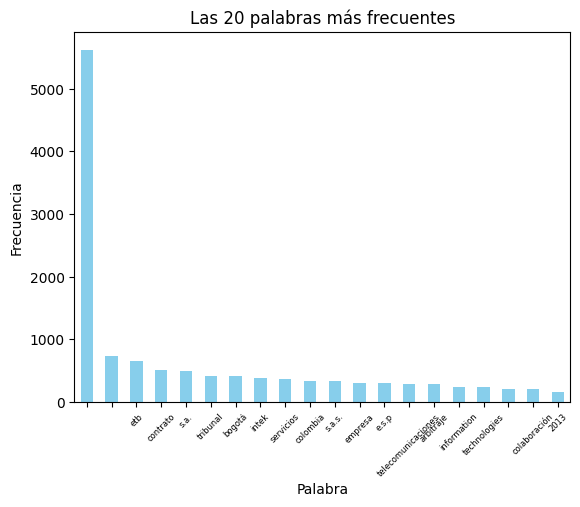

In [44]:
# Graficar las palabras más frecuentes
plt.figure(figsize=(15,9))
df_palabras.plot(kind='bar', x='Palabra', y='Frecuencia', legend=False, color='skyblue')
plt.title('Las 20 palabras más frecuentes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, fontsize=6)  # Decreased font size to 8
plt.show()

Análisis estilográfico

   Signo  Frecuencia
0      –         347
1      _       19684
2      ,        3664
3      (         361
4      )         345
5      .        1419
6      :         294
7      ;         153
8      “         298
9      ”         270
10     -          25
11     •          16
12     …          41
13     /          10
14    ):          13
15     [          19
16     ]          19
17     ¿          14
18     ?          31
19   ...           1
20     ‘           2
21     ’           3


<Figure size 1000x600 with 0 Axes>

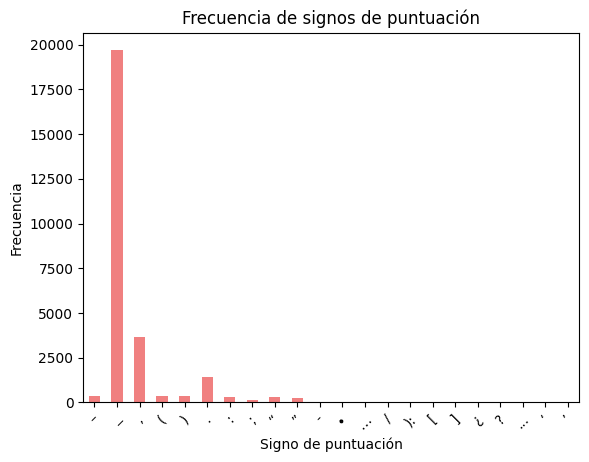

In [45]:
# Filtrar los signos de puntuación
puntuacion = [token.text for token in doc if token.is_punct]

# Contar la frecuencia de los signos de puntuación
frecuencia_puntuacion = Counter(puntuacion)

# Convertir los resultados en un DataFrame
df_puntuacion = pd.DataFrame(frecuencia_puntuacion.items(), columns=['Signo', 'Frecuencia'])

# Mostrar el DataFrame de puntuación
print(df_puntuacion)

# Graficar la frecuencia de los signos de puntuación
plt.figure(figsize=(10,6))
df_puntuacion.plot(kind='bar', x='Signo', y='Frecuencia', legend=False, color='lightcoral')
plt.title('Frecuencia de signos de puntuación')
plt.xlabel('Signo de puntuación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Análisis estilográfico